<a href="https://colab.research.google.com/github/1smiley43/Sales-Prediction-Project/blob/main/2Copy_of_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data


In [1]:
# Mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso


In [3]:
# Load the Dataset
filename = '/content/drive/MyDrive/Coding Dojo files/sales_predictions.xlsx'
sales_predictions = pd.read_excel(filename)

In [4]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



##Data Cleaning


In [6]:
# Getting a feel for the data 
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# How many rows and columns?
sales_predictions.shape

(8523, 12)

In [8]:
# What are the datatypes of each variable?
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Are there duplicates?
sales_predictions.duplicated().sum()

0

In [10]:
# If there are, drop them
# sales_predictions = sales_predictions.drop_duplicates()

Identifying missing values

In [11]:
# Display column names and datatypes
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
sales_predictions.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
# Create a filler to select only the object datatypes
data_types = sales_predictions.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [16]:
for column in object_data_types.index:
    # Display the unique values from the column
    print(column)
    print(sales_predictions[column].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' nan 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [17]:
sales_predictions.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}, inplace = True)
print(column)

print(sales_predictions[column].unique())


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Item Weight, Item_Fat_Content, and Outlet_Establishment_Year aren't related to sales predictions. So I'm going to elect to remove those *columns* entirely.



In [18]:
sales_predictions.drop(columns={'Item_Weight', 'Item_Fat_Content','Outlet_Establishment_Year' }, inplace=True)

In [19]:
## Display the count of missing values by column
print(sales_predictions.isna().sum())

Item_Identifier            0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64


In [20]:
sales_predictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Due to the categorical nature of the Outlet_Size, I'll elect to replace missing values with a "Unknown" moniker

In [21]:
sales_predictions['Outlet_Size'].fillna("Unknown", inplace = True)

In [22]:
## Display the count of missing values by column one more time
print(sales_predictions.isna().sum())

Item_Identifier         0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64


In [23]:
sales_predictions.describe()

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,2181.288914
std,0.051598,62.275067,1706.499616
min,0.000000,31.290000,33.290000
25%,0.026989,93.826500,834.247400
50%,0.053931,143.012800,1794.331000
75%,0.094585,185.643700,3101.296400
max,0.328391,266.888400,13086.964800


##Exploratory Visuals


Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

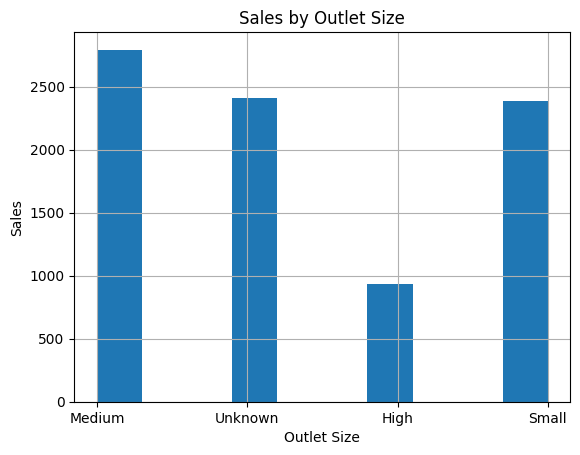

In [24]:
## Define a MatplotLib ax object using pandas' .hist()
ax = sales_predictions['Outlet_Size'].hist()
## Set the Title
ax.set_title('Sales by Outlet Size')
## Set the X axis label
ax.set_xlabel('Outlet Size')
## Set the Y axis label
ax.set_ylabel('Sales');

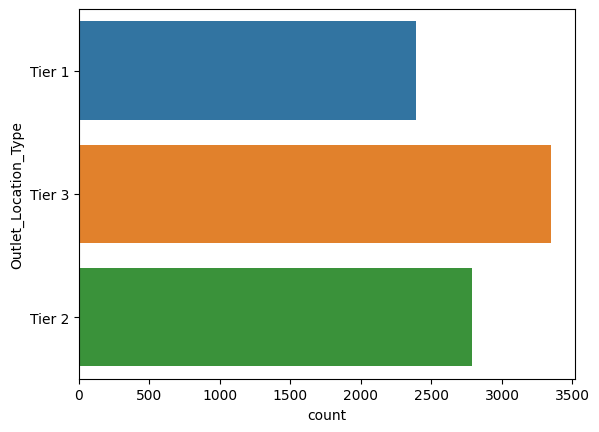

In [25]:
## Define a MatplotLib ax (plot) object using seaborn.countplot() to show differences in Location Type
ax = sns.countplot(data=sales_predictions, y='Outlet_Location_Type')

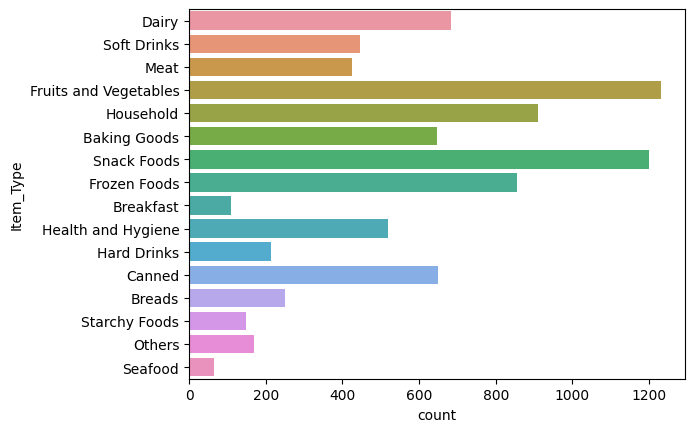

In [26]:
ax = sns.countplot(data=sales_predictions, y='Item_Type')

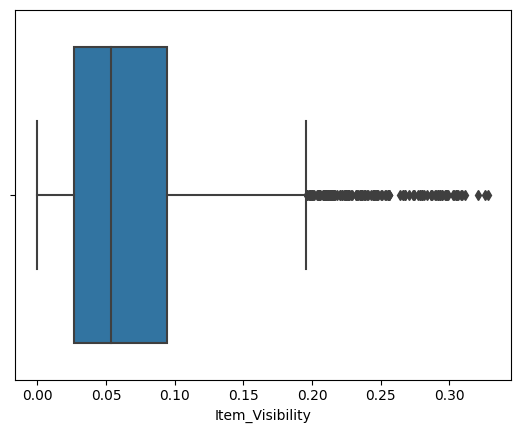

In [27]:
# Horizontal Boxplot in seaborn
ax = sns.boxplot(x = 'Item_Visibility', data = sales_predictions)

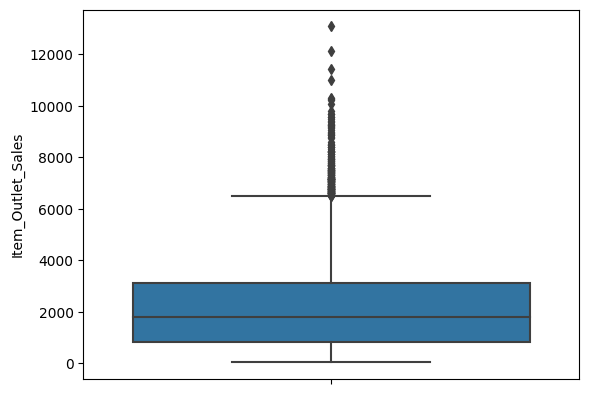

In [28]:
ax = sns.boxplot(y = 'Item_Outlet_Sales', data = sales_predictions)

<Axes: >

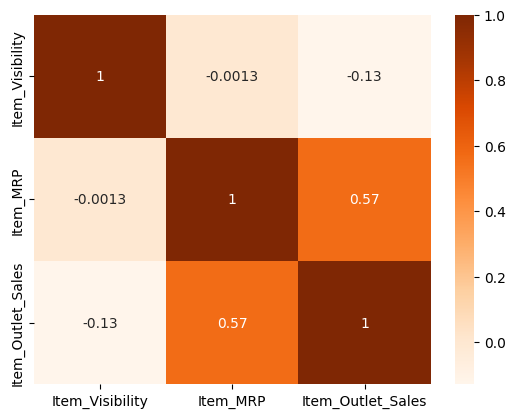

In [29]:
corr = sales_predictions.corr()
sns.heatmap(corr, cmap = 'Oranges', annot = True)

##Explanatory Visuals

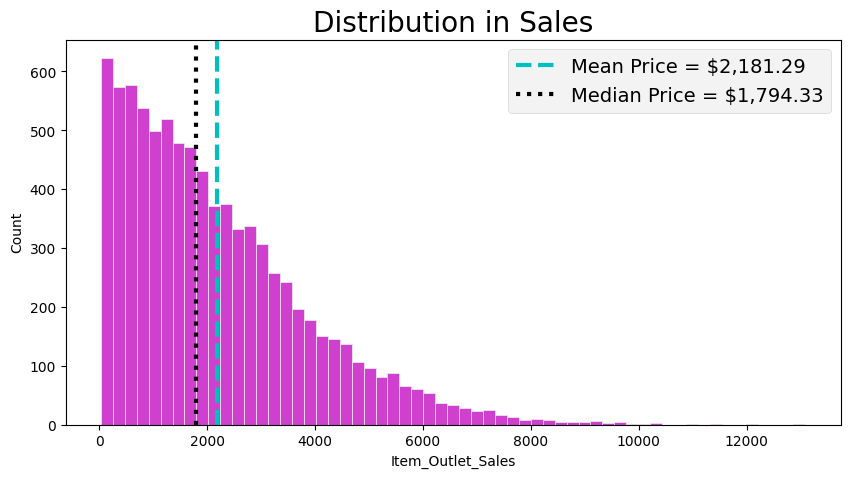

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
with plt.style.context('fivethirtyeight'):
  sns.histplot(data=sales_predictions,x='Item_Outlet_Sales',ax=ax, color='m')
  ax.set_title('Distribution in Sales')


  ## Annotating mean and median
  mean_price = sales_predictions['Item_Outlet_Sales'].mean()
  ax.axvline(mean_price,color='c', ls='--', lw=3,
           label=f"Mean Price = ${mean_price:,.2f}");

  med_price = sales_predictions['Item_Outlet_Sales'].median()
  ax.axvline(med_price,color='k', ls=':', lw=3,
           label=f"Median Price = ${med_price:,.2f}");
  ax.legend();

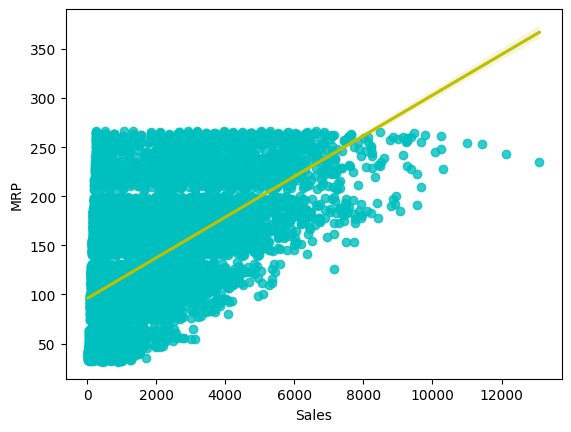

In [31]:
with plt.style.context('fast'):
  ax = sns.regplot(x ='Item_Outlet_Sales', y = 'Item_MRP', data = sales_predictions, color = 'c', line_kws = {'color':'y'})
  ax.set(xlabel='Sales', ylabel='MRP')

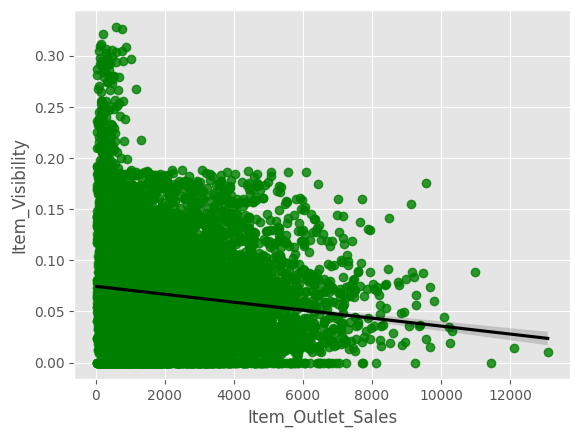

In [32]:
with plt.style.context('ggplot'):
  ax = sns.regplot(x ='Item_Outlet_Sales', y = 'Item_Visibility', data = sales_predictions, color = 'g', line_kws = {'color':'k'})

#Preprocessing for Machine Learning

In [33]:
# Load the Dataset
filename = '/content/drive/MyDrive/Coding Dojo files/sales_predictions (2).csv'
sales_predictions2 = pd.read_csv(filename)

In [34]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [35]:
sales_predictions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Before splitting your data, I'll drop duplicates and fix inconsistencies in categorical data.

In [36]:
sales_predictions2 = sales_predictions2.drop_duplicates()

In [37]:
for column in object_data_types.index:
    # Display the unique values from the column
    print(column)
    print(sales_predictions2[column].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' nan 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [38]:
sales_predictions2.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}, inplace = True)
print(column)

print(sales_predictions2[column].unique())

Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.


In [39]:
# Assign the target
y = sales_predictions2['Item_Outlet_Sales']
# Assign the features by dropping only the target column (X is capitalized due to it being the matrix)
X = sales_predictions2.drop(columns = 'Item_Outlet_Sales')

Perform a train test split


In [40]:
# split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=404)

Create a preprocessing object to prepare the dataset for Machine Learning


In [41]:
sales_predictions2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


Prepping Nominal data

In [42]:
# Due to high cardinality, drop the 'Item Identifier' feature here
sales_predictions2.drop(columns = 'Item_Identifier', inplace = True)

In [43]:
# OneHot Encoding all nominal features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
# Replacing all missing Outlet Sizes as "unknown"
const_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

In [44]:
# Creating nominal pipeline
nom_pipe = make_pipeline(const_imputer, ohe)
# Selecting nominal columns
nom_cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
# Creating nominal tuple
nom_tuple = (nom_pipe, nom_cols)

Prepping Numerical data

In [45]:
sales_predictions2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [46]:
sales_predictions2.nunique()

Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [47]:
# SimpleImputer replacing missing values for Item Weight with the mean for numeric columns 
mean_imputer = SimpleImputer(strategy='mean')

In [48]:
# Scale the numeric columns
scaler = StandardScaler()

In [49]:
# Creating a numerical pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
# Selecting numerical columns
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
# Creating numerical tuple
num_tuple = (num_pipe, num_cols)

Creating a preprocessor

In [50]:
preprocessor = make_column_transformer(num_tuple, nom_tuple,remainder='drop')

#Creating a Linear Regression model to predict sales

In [51]:
# Instantiate the regression model
lin_reg = LinearRegression()
# Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
# Fit the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

In [52]:
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

In [53]:
mse = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_pred)
print(f'RMSE for Training data: {rmse}\n R2 for Training data: {r2}')

RMSE for Training data: 1123.8998444176802
 R2 for Training data: 0.5695255660827053


In [54]:
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_pred)
print(f'RMSE for Testing data: {rmse}\n R2 for Testing data: {r2}')

RMSE for Testing data: 1138.8930792786596
 R2 for Testing data: 0.5434402534179733


In [ ]:
## Create an instance of the model
l_reg = Lasso()
## Create a model pipeline
l_reg_pipe = make_pipeline(preprocessor, l_reg)
## Fit the model
l_reg_pipe.fit(X_train, y_train)

#Creating a Regression Tree model to predict sales

In [55]:
# Instantiate the regression model
reg_tree = DecisionTreeRegressor(random_state=42)
# Create a model pipeline
reg_tree_pipe = make_pipeline(preprocessor, reg_tree)
# Fit the model
reg_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [56]:
train_pred = reg_tree_pipe.predict(X_train)
test_pred = reg_tree_pipe.predict(X_test)

In [57]:
mse = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_pred)
print(f'RMSE for Training data: {rmse}\n R2 for Training data: {r2}')

RMSE for Training data: 0.0
 R2 for Training data: 1.0


In [58]:
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_pred)
print(f'RMSE for Testing data: {rmse}\n R2 for Testing data: {r2}')

RMSE for Testing data: 1529.9966964730718
 R2 for Testing data: 0.17602753884643552


In [60]:
reg_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [63]:
reg_tree_pipe['decisiontreeregressor'].get_depth()

35

In [68]:
## Create a range of values from 1 to max_depth to evaluate
depths = range(1, 36)
scores = pd.DataFrame(index=depths, columns=['Test R2', 'Train R2'])
## Create a dataframe to store Train and Test  R2 scores


## Loop through the max_depth values
for depth in depths:

  ## Create an instance of the model
  dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
  ## Create a model pipeline
  dt_pipe = make_pipeline(preprocessor, dt)
  ## Fit the model
  dt_pipe.fit(X_train, y_train)


  ## Obtain the predictions from the model
  train_preds = dt_pipe.predict(X_train)
  test_preds = dt_pipe.predict(X_test)


  ## Obtain the R2 scores for Train and Test
  train_r2 = r2_score(y_train, train_preds)
  test_r2 = r2_score(y_test, test_preds)


  ## Save the Train and Test R2 Score for this depth in the scores dataframe
  scores.loc[depth, 'Test R2'] = test_r2
  scores.loc[depth, 'Train R2'] = train_r2

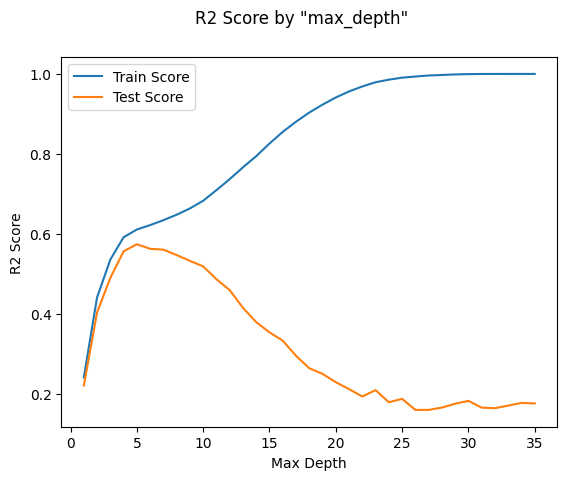

In [69]:
##Visualize the max_depths to display which achieves the highest R2 score
plt.plot(depths, scores['Train R2'], label='Train Score')
plt.plot(depths, scores['Test R2'], label='Test Score')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.suptitle('R2 Score by "max_depth"')
plt.legend()
plt.show()

In [70]:
sorted_scores = scores.sort_values(by='Test R2', ascending=False)
sorted_scores

,Test R2,Train R2
5,0.574038,0.610969
6,0.562743,0.621978
7,0.560475,0.634314
4,0.556474,0.591641
8,0.547106,0.647956
9,0.532472,0.66367
10,0.518701,0.682841
3,0.489871,0.535776
11,0.486677,0.709411
12,0.4594,0.736881


In [71]:
# Instantiate a new regression model with 5 as its max depth
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=5)
# Create a model pipeline
reg_tree_pipe = make_pipeline(preprocessor, reg_tree)
# Fit the model
reg_tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [72]:
train_pred = reg_tree_pipe.predict(X_train)
test_pred = reg_tree_pipe.predict(X_test)


In [73]:
mse = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_pred)
print(f'RMSE for Training data: {rmse}\n R2 for Training data: {r2}')
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_pred)
print(f'RMSE for Testing data: {rmse}\n R2 for Testing data: {r2}')

RMSE for Training data: 1068.429642057492
 R2 for Training data: 0.6109691893038818
RMSE for Testing data: 1100.0684740167412
 R2 for Testing data: 0.5740377148242786


###Overall, which model would you recommend?

I'd recommend the decision tree after its tuning. It gives a more fitted example.